# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the Cardio Dataset
mydata = pd.read_csv('/content/drive/MyDrive/MIT_DATA/foodhub/foodhub_order.csv')

### Understanding the structure of the data

In [5]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT_DATA/foodhub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:

rows, columns = df.shape


print(f"Number of entries (rows): {rows}")
print(f"Number of columns: {columns}")


Number of entries (rows): 1898
Number of columns: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:


print(df.dtypes.value_counts())

int64      4
object     4
float64    1
Name: count, dtype: int64


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:

print(f"There are no missing values:\n{df.shape[0] - df.count()}")

There are no missing values:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# df.describe()

print(f"Minimum Food prep time: {round(df['food_preparation_time'].min())} minutes")
print(f"Average Food prep time: {round(df['food_preparation_time'].mean())} minutes")
print(f"Maximum Food prep time: {round(df['food_preparation_time'].max())} minutes")

Minimum Food prep time: 20 minutes
Average Food prep time: 27 minutes
Maximum Food prep time: 35 minutes


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [62]:
# number of NaN values in the 'rating' column
not_given_count = df['rating'].isna().sum()

print("Number of 'Not given' ratings (NaN values):", not_given_count)





Number of 'Not given' ratings (NaN values): 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

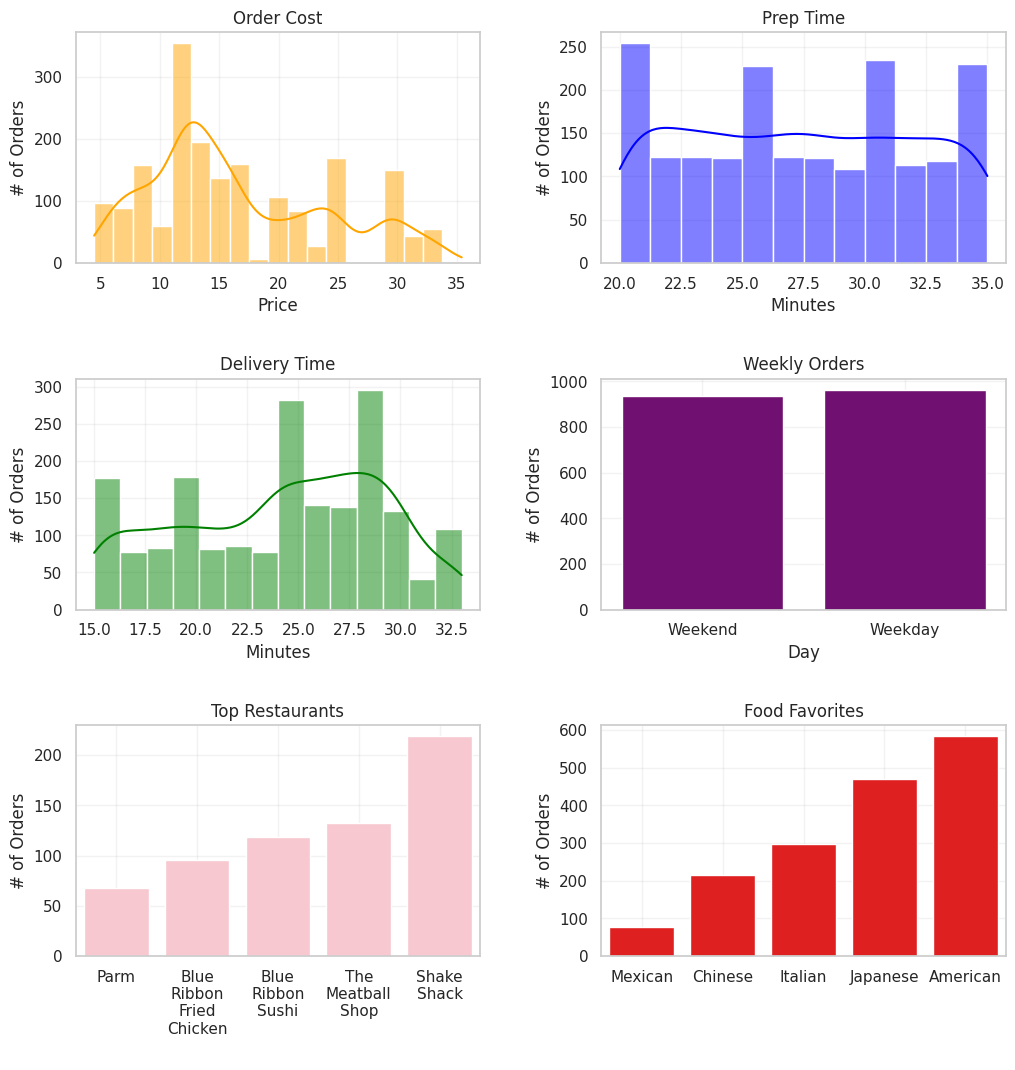

In [54]:


# Set the style for plots
sns.set(style="whitegrid")

plt.subplots(figsize=(12, 12) )
plt.grid(True, linestyle='-', color='white', alpha=0.1)
plt.gca().set_axis_off()

# Plot the first histogram
plt.subplot(3, 2, 1)
sns.histplot(data=df, x='cost_of_the_order',  kde=True, color='orange')

plt.title('Order Cost')
plt.xlabel('Price')
plt.ylabel('# of Orders')
plt.grid(True, linestyle='-', color='gray', alpha=0.1)


plt.subplot(3, 2, 2)
sns.histplot(data=df, x='food_preparation_time', kde=True, color='blue')
plt.title('Prep Time')
plt.xlabel('Minutes')
plt.ylabel('# of Orders')
plt.grid(True, linestyle='-', color='gray', alpha=0.1)


plt.subplot(3, 2, 3)
sns.histplot(data=df, x='delivery_time', kde=True, color='green')

plt.title('Delivery Time')
plt.xlabel('Minutes')
plt.ylabel('# of Orders')
plt.grid(True, linestyle='-', color='gray', alpha=0.1)


plt.subplot(3, 2, 4)
sns.countplot(data=df, x='day_of_the_week', color='purple')
plt.title('Weekly Orders')
plt.xlabel('Day')
plt.ylabel('# of Orders')
plt.grid(True, linestyle='-', color='gray', alpha=0.1)


plt.subplot(3, 2, 5)


top_5_cuisines = df['restaurant_name'].value_counts().nlargest(5).index


df_top_5 = df[df['restaurant_name'].isin(top_5_cuisines)]


sorted_top_5_cuisines = df_top_5['restaurant_name'].value_counts().sort_values().index


labels = [label.replace(' ', '\n') if ' ' in label else label for label in sorted_top_5_cuisines]
plt.xticks(ticks=range(len(sorted_top_5_cuisines)), labels=labels)

sns.countplot(data=df_top_5, x='restaurant_name', color='pink', order=sorted_top_5_cuisines)
plt.title("Top Restaurants")
plt.xlabel(' ')
plt.ylabel('# of Orders')
plt.grid(True, linestyle='-', color='gray', alpha=0.1)

plt.subplot(3, 2, 6)

top_5_cuisines = df['cuisine_type'].value_counts().nlargest(5).index


df_top_5 = df[df['cuisine_type'].isin(top_5_cuisines)]


sorted_top_5_cuisines = df_top_5['cuisine_type'].value_counts().sort_values().index


sns.countplot(data=df_top_5, x='cuisine_type', color='red', order=sorted_top_5_cuisines)



plt.title("Food Favorites")
plt.xlabel(' ')
plt.ylabel('# of Orders')
plt.grid(True, linestyle='-', color='gray', alpha=0.1)


plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()






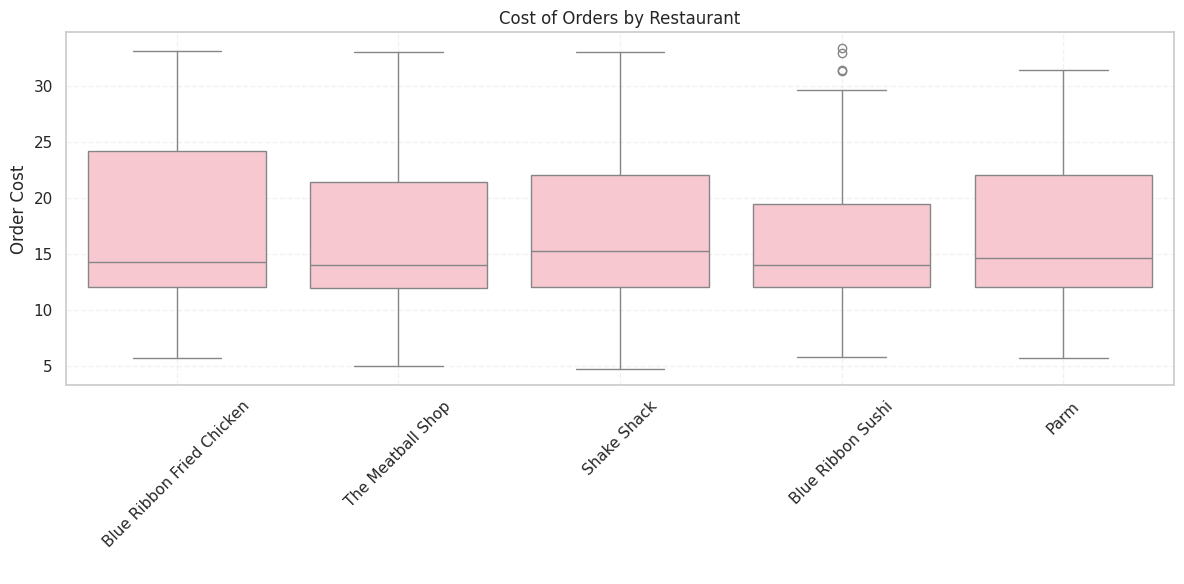

In [ ]:
# If you want to focus on the top 5 restaurants by the number of orders:
top_5_restaurants = df['restaurant_name'].value_counts().nlargest(5).index
df_top_5_restaurants = df[df['restaurant_name'].isin(top_5_restaurants)]

# Plot the box plot for "cost_of_the_order" across different restaurants
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(data=df_top_5_restaurants, x='restaurant_name', y='cost_of_the_order', color='pink')

# Add titles and labels
plt.title("Cost of Orders by Restaurant")
plt.xlabel(' ')
plt.ylabel('Order Cost')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.grid(True, linestyle='--', color='gray', alpha=0.1)

# Show the plot
plt.tight_layout()
plt.show()


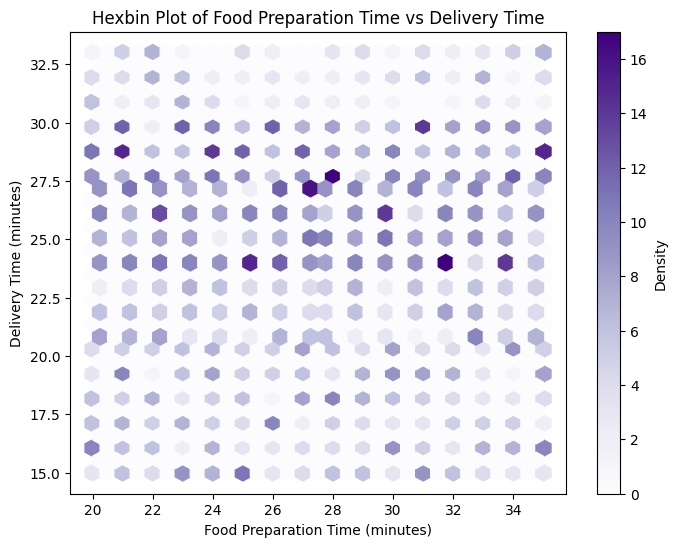

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a hexbin plot
plt.figure(figsize=(8, 6))
plt.hexbin(df['food_preparation_time'], df['delivery_time'], gridsize=30, cmap='Purples')

# Add color bar
plt.colorbar(label='Density')

# Add title and labels
plt.title('Hexbin Plot of Food Preparation Time vs Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')

# Show the plot
plt.show()



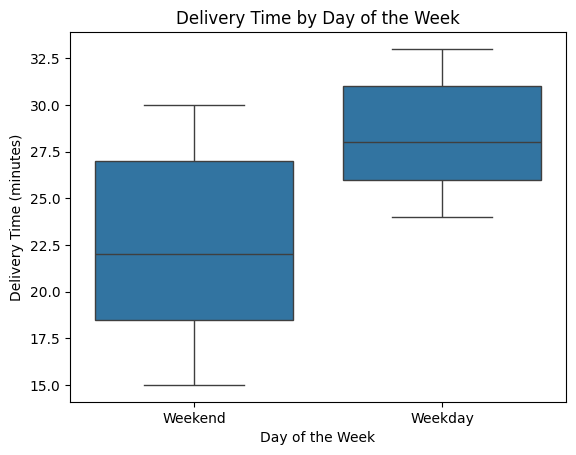

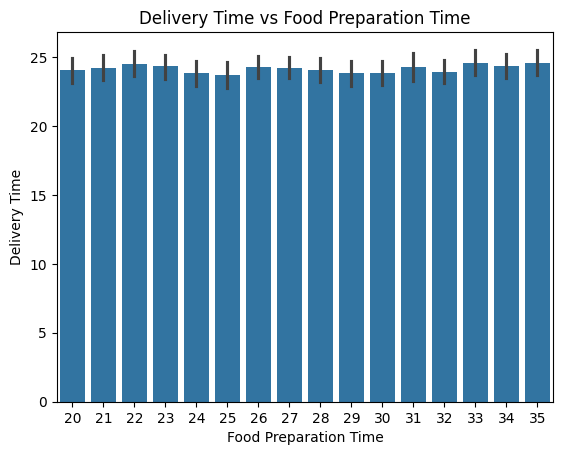

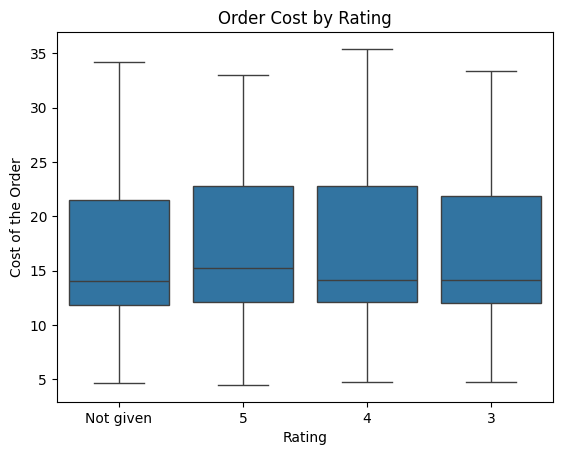

In [15]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title('Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

sns.barplot(data=df, x='food_preparation_time', y='delivery_time')
plt.title('Delivery Time vs Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Delivery Time')
plt.show()

rating_order = ['Not given', 5, 4, 3]

# Create the boxplot
sns.boxplot(data=df, x='rating', y='cost_of_the_order', order=rating_order)
plt.title('Order Cost by Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [50]:
# Group by 'restaurant_name' and count the number of orders for each restaurant
top_restaurants = df['restaurant_name'].value_counts().head(5)

print("Top 5 restaurants in terms of the number of orders received:")
print(top_restaurants)


Top 5 restaurants in terms of the number of orders received:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [49]:
# Filter the dataset for weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Group by 'cuisine_type' and count the number of orders for each cuisine
most_popular_cuisine = weekend_orders['cuisine_type'].value_counts().idxmax()


print("The most popular cuisine on weekends is:", most_popular_cuisine)


The most popular cuisine on weekends is: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# total number of orders
total_orders = len(df)

# number of orders where the cost is greater than $20
orders_above_20 = len(df[df['cost_of_the_order'] > 20])

# percentage of orders that cost more than $20
percentage_above_20 = (orders_above_20 / total_orders) * 100

print(f'Percentage of orders that cost more than $20: {percentage_above_20:.2f}%')


Percentage of orders that cost more than $20: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [48]:
# Write the code here
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Print the mean delivery time
print(f'Mean Delivery Time: {mean_delivery_time:.2f} minutes')

Mean Delivery Time: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [47]:
# Write the code here
# Count the frequency of each customer_id
customer_counts = df['customer_id'].value_counts()

top_3_customers_df = customer_counts.reset_index()
top_3_customers_df.columns = ['customer_id', 'order_count']
print(top_3_customers_df)


      customer_id  order_count
0           52832           13
1           47440           10
2           83287            9
3          250494            8
4          259341            7
...           ...          ...
1195       143926            1
1196        89574            1
1197       157711            1
1198        66393            1
1199       358141            1

[1200 rows x 2 columns]


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


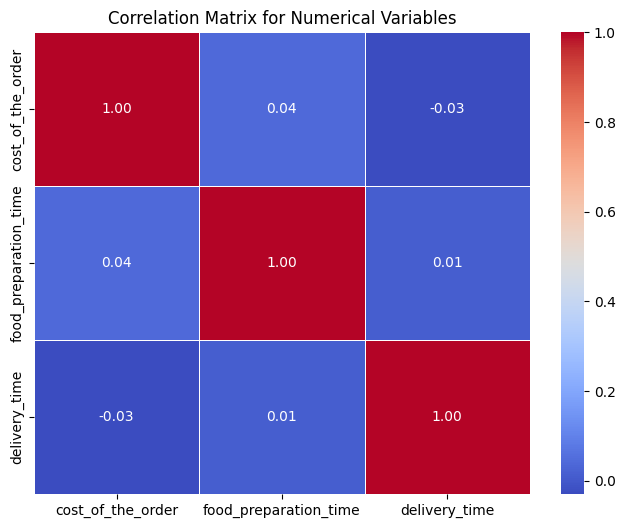

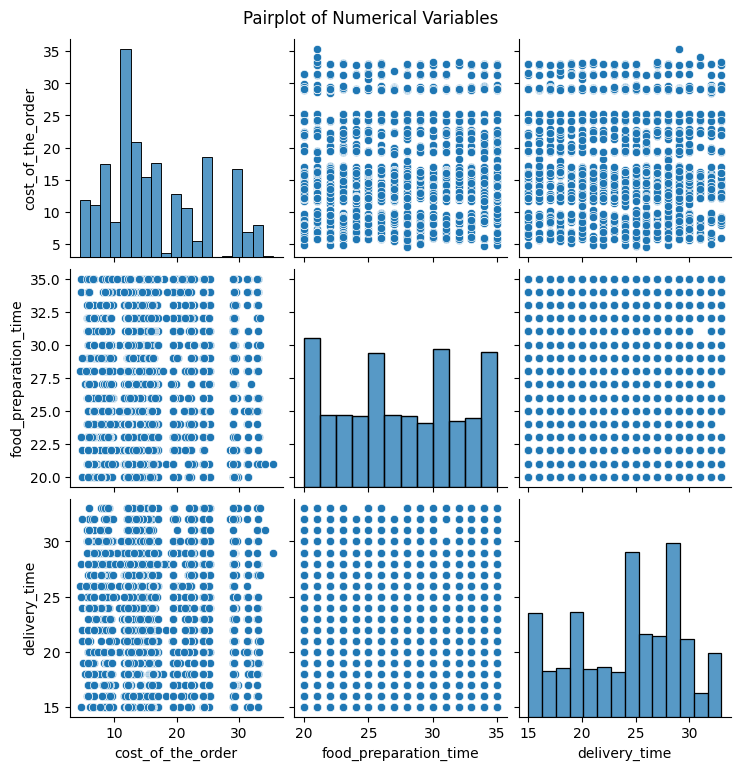

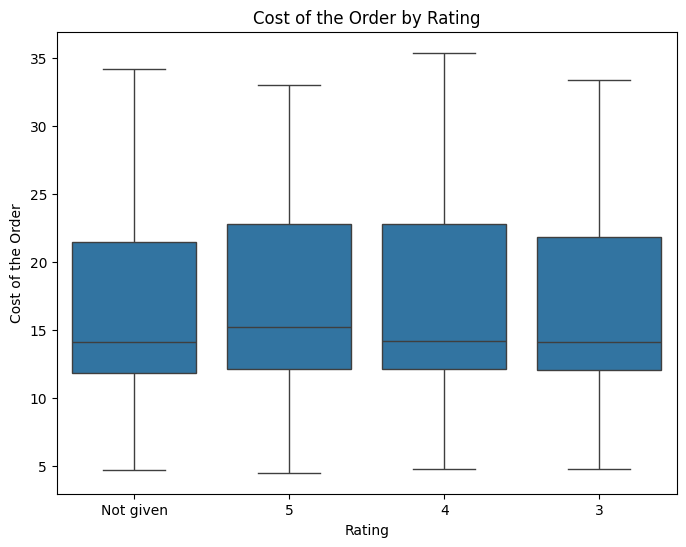

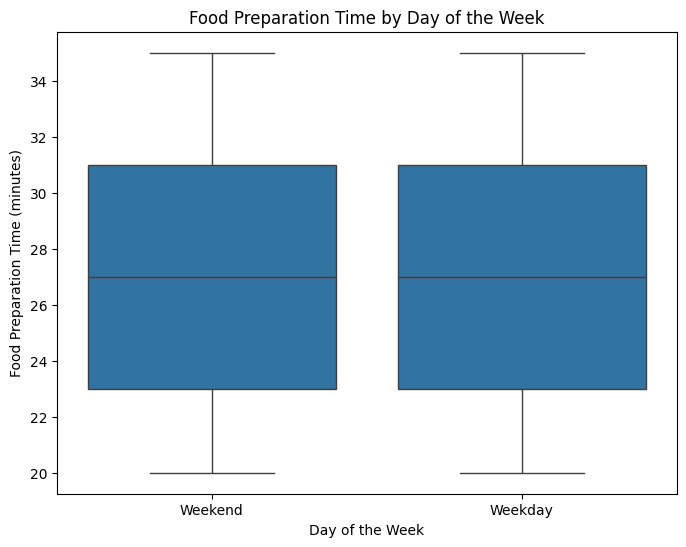

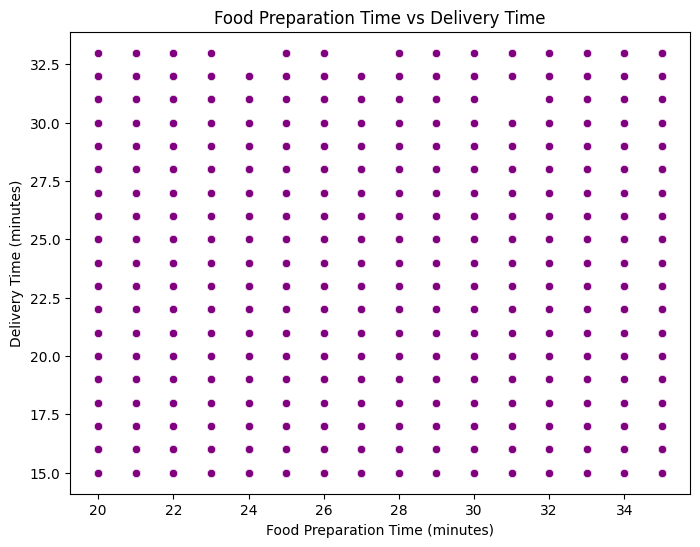

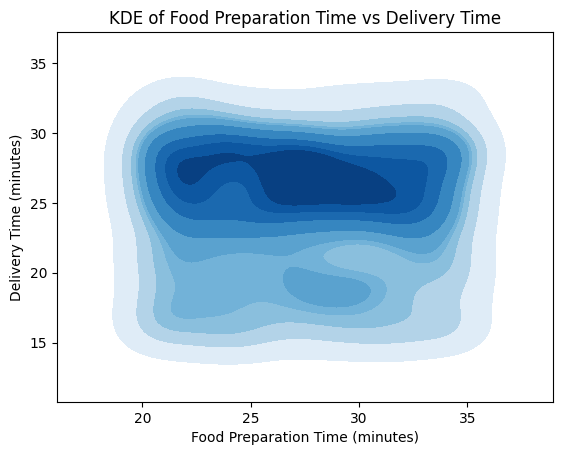

In [18]:



numerical_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']  #
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

# Pairplot to explore relationships between numerical variables
sns.pairplot(df[numerical_columns], kind='scatter', height=2.5)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


# Numerical vs Categorical: Cost of the Order vs Rating
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='rating', y='cost_of_the_order', order=['Not given', 5, 4, 3])
plt.title('Cost of the Order by Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

# Boxplot: Food Preparation Time vs Day of the Week
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time')
plt.title('Food Preparation Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()


# Scatterplot: Food Preparation Time vs Delivery Time
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time', color='purple')
plt.title('Food Preparation Time vs Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# KDE plot for Food Preparation Time vs Delivery Time (alternative to scatterplot)
sns.kdeplot(x=df['food_preparation_time'], y=df['delivery_time'], cmap='Blues', fill=True)
plt.title('KDE of Food Preparation Time vs Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [21]:
# convert the 'rating' column to numeric, forcing errors to NaN for non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# group by 'restaurant_name' and calculate rating count and average rating
restaurant_stats = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# restaurants that meet the criteria
eligible_restaurants = restaurant_stats[(restaurant_stats['rating_count'] > 50) & (restaurant_stats['average_rating'] > 4)]


print(eligible_restaurants.to_string(index=False))



          restaurant_name  rating_count  average_rating
Blue Ribbon Fried Chicken            64        4.328125
        Blue Ribbon Sushi            73        4.219178
              Shake Shack           133        4.278195
        The Meatball Shop            84        4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [22]:
# function to calculate the revenue for each order
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0

# apply the function to the DataFrame to create a new 'revenue' column
df['revenue'] = df.apply(calculate_revenue, axis=1)

# total net revenue across all orders
total_revenue = df['revenue'].sum()


print(f"Total net revenue generated by the company: ${total_revenue:.2f}")


Total net revenue generated by the company: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [23]:
# total time (food preparation + delivery time) for each order
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# count how many orders take more than 60 minutes
orders_more_than_60 = df[df['total_delivery_time'] > 60].shape[0]

# calculate the percentage of orders taking more than 60 minutes
total_orders = df.shape[0]
percentage_more_than_60 = (orders_more_than_60 / total_orders) * 100


print(f"Percentage of orders taking more than 60 minutes: {percentage_more_than_60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [40]:

mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()


print("\nMean Delivery Time for Weekdays and Weekends:")
print(mean_delivery_time.to_string(index=False))


Mean Delivery Time for Weekdays and Weekends:
day_of_the_week  delivery_time
        Weekday      24.054979
        Weekend      24.271949


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Improving Delivery Speed: The company should work on speeding up delivery times to keep customers happy, especially on weekends.

* Highlighting Popular Restaurants: Use the top-rated restaurants as examples of success and promote them more to boost the app's overall performance.

* Promoting Types of Cuisine: Focus on showcasing popular types of food and enhancing the less popular ones based on what customers say.

* By paying attention to ratings and types of cuisine, the business can improve its services, keep customers coming back, and increase revenue.

### Recommendations:



To improve the business, here are some suggestions. First, speed up delivery times by using real-time traffic information to plan better routes and make food packaging at the restaurant more efficient to reduce delays. Quicker deliveries and good quality food will make customers happier and lead to better reviews. For marketing, focus on promoting popular dishes that are highly rated, and consider offering special deals for these items. If you have dishes that aren't rated as well, think about enhancing the recipes, using better ingredients, or improving customer service. Showcasing top-rated restaurants on the app and creating loyalty programs can help attract more customers and keep them coming back. Listening to customer feedback is important to spot recurring problems, which can be fixed with better quality checks and staff training. To manage the higher number of orders during the weekends, think about hiring more delivery staff or improving the restaurant's operations. Lastly, look at how order costs relate to ratings, so you can adjust pricing or offer premium options, which can help increase revenue through customizable extras.